In [1]:
import tensorflow as tf
print(tf.__version__)


2.5.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images=training_images / 255.0
test_images=test_images / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)
print('Test Loss:{}'.format(test_loss))

Epoch 1/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4464 - accuracy: 0.8386
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2492 - accuracy: 0.9083
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2179 - accuracy: 0.9186
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2626 - accuracy: 0.9006
Test Loss:[0.26260149478912354, 0.900600016117096]


# Adding one more Convolution and Pooling layers

In [6]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(training_images, training_labels, epochs=5)
test_loss = model1.evaluate(test_images, test_labels)
print('Test Loss:{}'.format(test_loss))

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5711 - accuracy: 0.7904
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3868 - accuracy: 0.8580
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3296 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2950 - accuracy: 0.8896
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3241 - accuracy: 0.8823
Test Loss:[0.3241157829761505, 0.8823000192642212]


In [8]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

# Using 16 kernels

In [9]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)               

In [10]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(training_images, training_labels, epochs=5)
test_loss = model2.evaluate(test_images, test_labels)
print('Test Loss:{}'.format(test_loss))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7375 - accuracy: 0.7251
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5171 - accuracy: 0.8089
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4600 - accuracy: 0.8310
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4246 - accuracy: 0.8433
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4132 - accuracy: 0.8503
Test Loss:[0.41322246193885803, 0.8503000140190125]


# Adding CallBacks

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks = [callbacks])
test_loss = model.evaluate(test_images, test_labels)
print('Test Loss:{}'.format(test_loss))

Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4364 - accuracy: 0.8407
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2909 - accuracy: 0.8938
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2491 - accuracy: 0.9076
Epoch 4/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2162 - accuracy: 0.9195
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1881 - accuracy: 0.9294
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1682 - accuracy: 0.9365
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1472 - accuracy: 0.9455
Epoch 8/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1294 - accuracy: 0.9522

Reached 95% accuracy so cancelling training!
313/313 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.9124
Test Loss:[0.2670072615146637, 0.

# Visualizing the Convolutions and Poolings

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


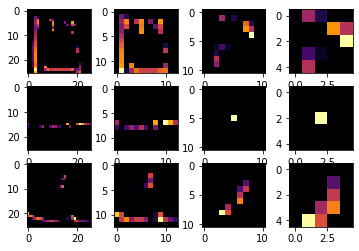

In [19]:
import matplotlib.pyplot as plt
print(test_labels[:100])
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=9
THIRD_IMAGE=39
CONVOLUTION_NUMBER = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].grid(False)
    axarr[1,x].grid(False)
    axarr[2,x].grid(False)
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
